# The Best Neighborhoods for Summer Fun in Pittsburgh
### By Group 33: Peter Ford, Nolan Grace, and Gabe Schmidt 

In the proceeding data driven argument, we will make the case that one neighborhood stands above the rest in regards to having summer fun in Pittsburgh. We will analyze the City's Playgrounds, Courts, and Parks to see which neighborhood possesses the best summer fun facilities.

In picking our data sets we also considered:
- Swimming Pools
- Public Art
- Fields

Despite these other good(or not so good) candidates, we landed on these three for their quality and max fun relation. Weighing each of the datasets with equal importance, we will then set out to determine which one can be considered the best.

## Playgrounds

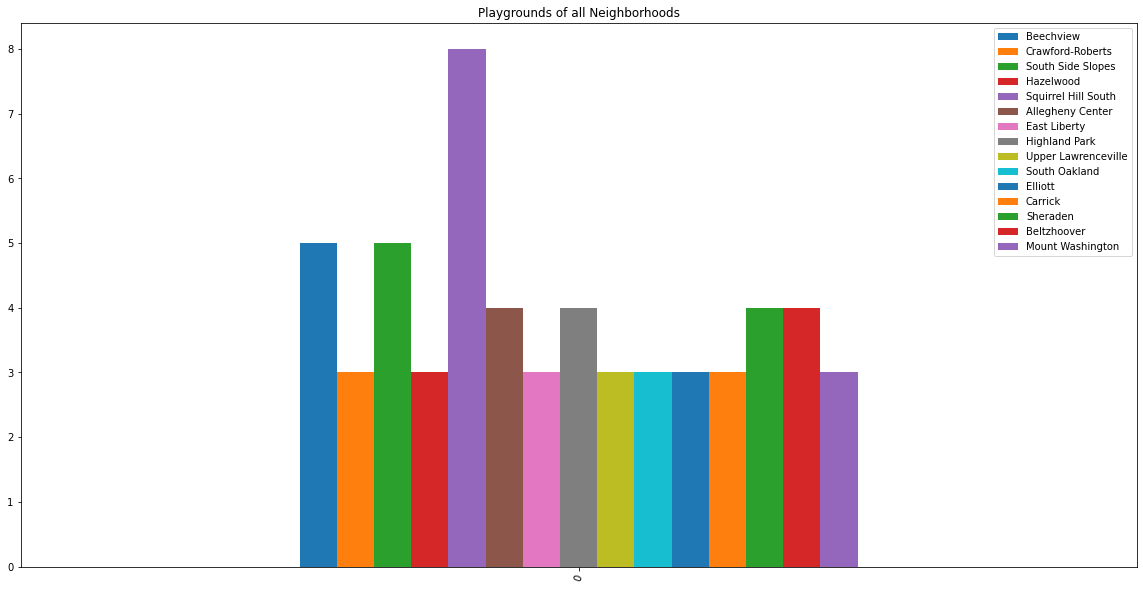

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


pgs = pd.read_csv("Playgrounds.csv")
neighborhoods = {}
for index, row in pgs.iterrows():
    hood = row['neighborhood']
    if(neighborhoods.get(hood, -1) == -1):
        neighborhoods[hood] = 1
    else:
        neighborhoods[hood] += 1
#neighborhoods
neighborDf = pd.DataFrame([neighborhoods])

for col in neighborDf.columns:
    if neighborDf[col].values[0] < 3:
        del neighborDf[col]

neighborDf.plot.bar(rot= 70, title="Playgrounds of all Neighborhoods", figsize = (20, 10))

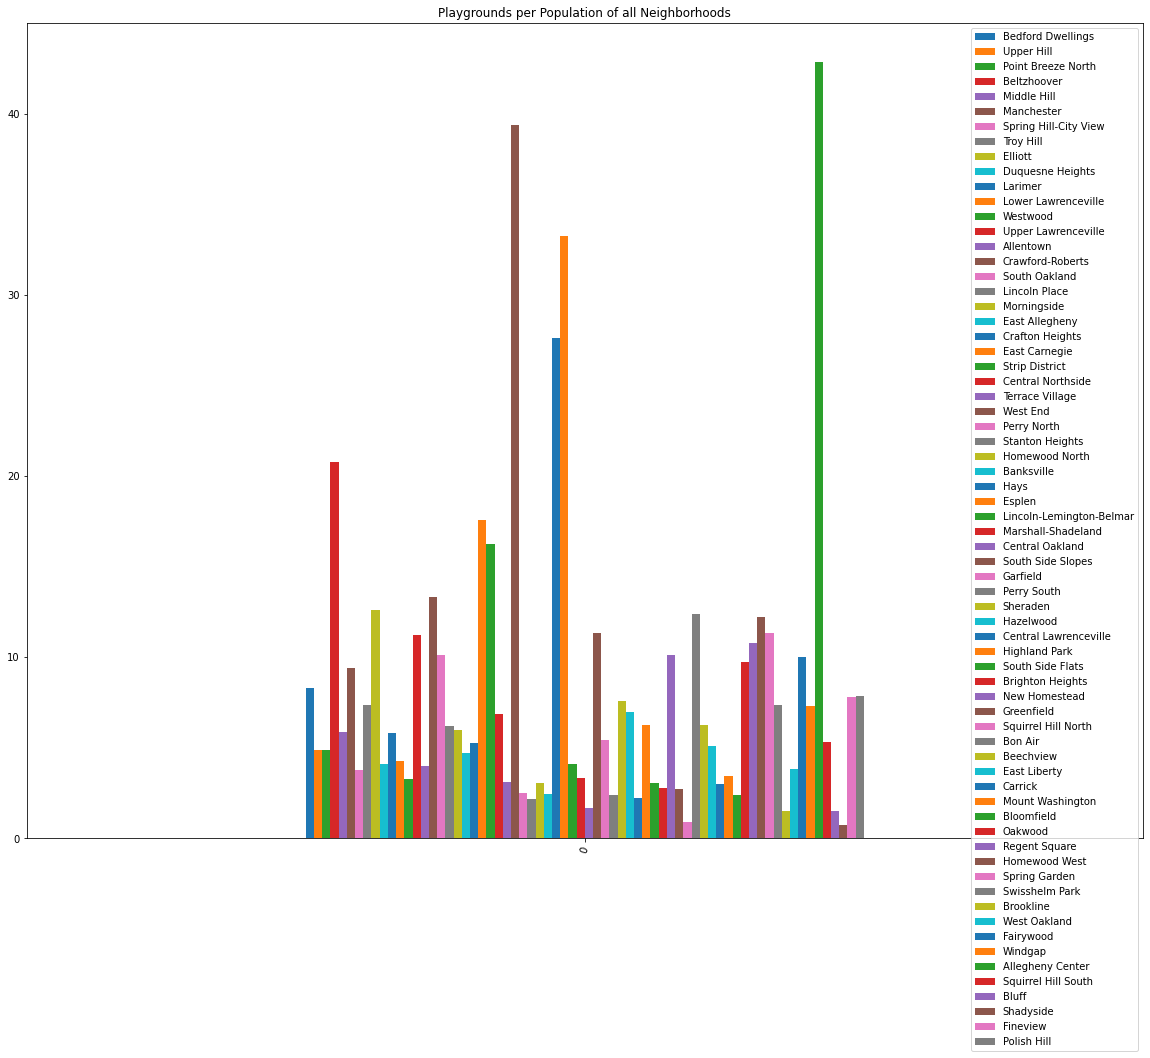

In [17]:
npl = pd.read_csv("NeighborhoodPopulation.csv")

metricDict = {}
for index, row in npl.iterrows():
    hood = row['Neighborhood']
    pop = row['Population (2010)']
    pop = pop.replace(",", "")
    if neighborhoods.get(hood) is not None:
        PPP = (neighborhoods.get(hood)/int(pop)) * 10000 #PPP = playgrounds per population
        metricDict[hood] = PPP
    
pppDf = pd.DataFrame([metricDict])

pppDf.plot.bar(rot= 70, title="Playgrounds per Population of all Neighborhoods", figsize = (20, 15))

In [3]:
for col in pppDf.columns:
    if pppDf[col].values[0] > 20:
        print(col + ": " + str(pppDf[col].values[0]))

pppDf.mean(axis = 1)

Beltzhoover: 20.77922077922078
West End: 39.37007874015748
Hays: 27.624309392265193
Esplen: 33.222591362126245
Allegheny Center: 42.87245444801715


0    8.137146
dtype: float64

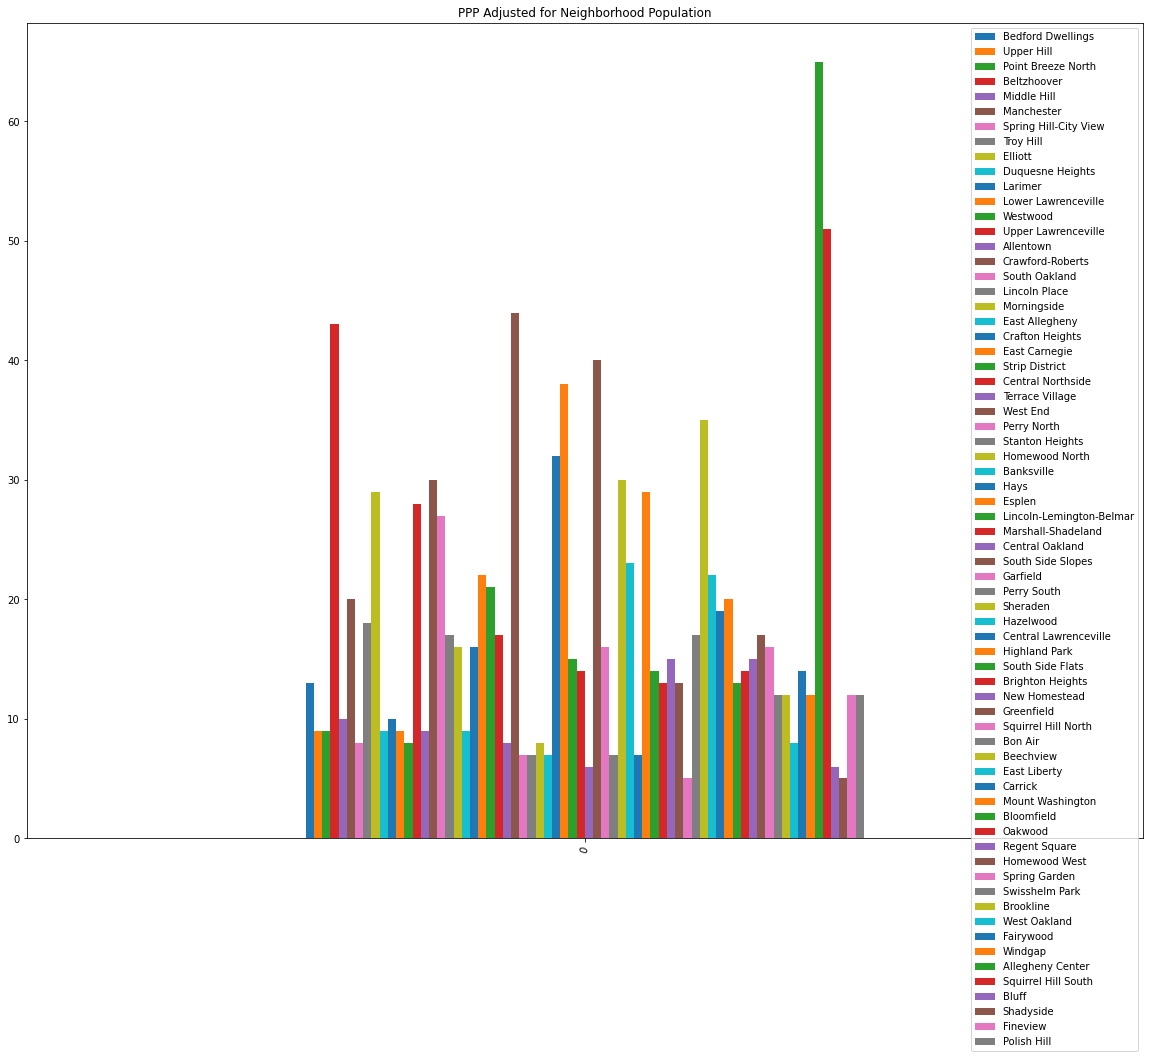

In [4]:
comboMetric = {}

for col in pppDf.columns:
    if neighborhoods.get(col) is not None:
        comboMetric[col] = int(neighborhoods.get(col) * pppDf.median(axis = 1)) + int(pppDf[col].values[0])

        
combo = pd.DataFrame([comboMetric])

combo.plot.bar(rot= 70, title="PPP Adjusted for Neighborhood Population", figsize = (20, 15))


In [5]:
for col in combo.columns:
    if combo[col].values[0] < 22:
        #print(col + ": " + str(combo[col].values[0]))
        del(combo[col])

combo.sort_values(by = 0, axis = 1, ascending = False)

,Allegheny Center,Squirrel Hill South,West End,Beltzhoover,South Side Slopes,Esplen,Beechview,Hays,Crawford-Roberts,Sheraden,Elliott,Highland Park,Upper Lawrenceville,South Oakland,Hazelwood,East Carnegie,East Liberty
0,65,51,44,43,40,38,35,32,30,30,29,29,28,27,23,22,22


In conclusion, the top five best playground neighborhoods are:
1. Allegheny Center
2. Squirrel Hill South
3. West End
4. Beltzhoover
5. South Side Slopes



## Courts

The Top 5 Neighborhoods for Courts and Rinks Are
Brookline :  9
Hazelwood :  10
Squirrel Hill South :  23
Highland Park :  20
Beltzhoover :  9

The Top 5 Neighborhoods for Courts and Rinks rated out of 100
Brookline :  39.130434782608695
Hazelwood :  43.47826086956522
Squirrel Hill South :  100.0
Highland Park :  86.95652173913044
Beltzhoover :  39.130434782608695


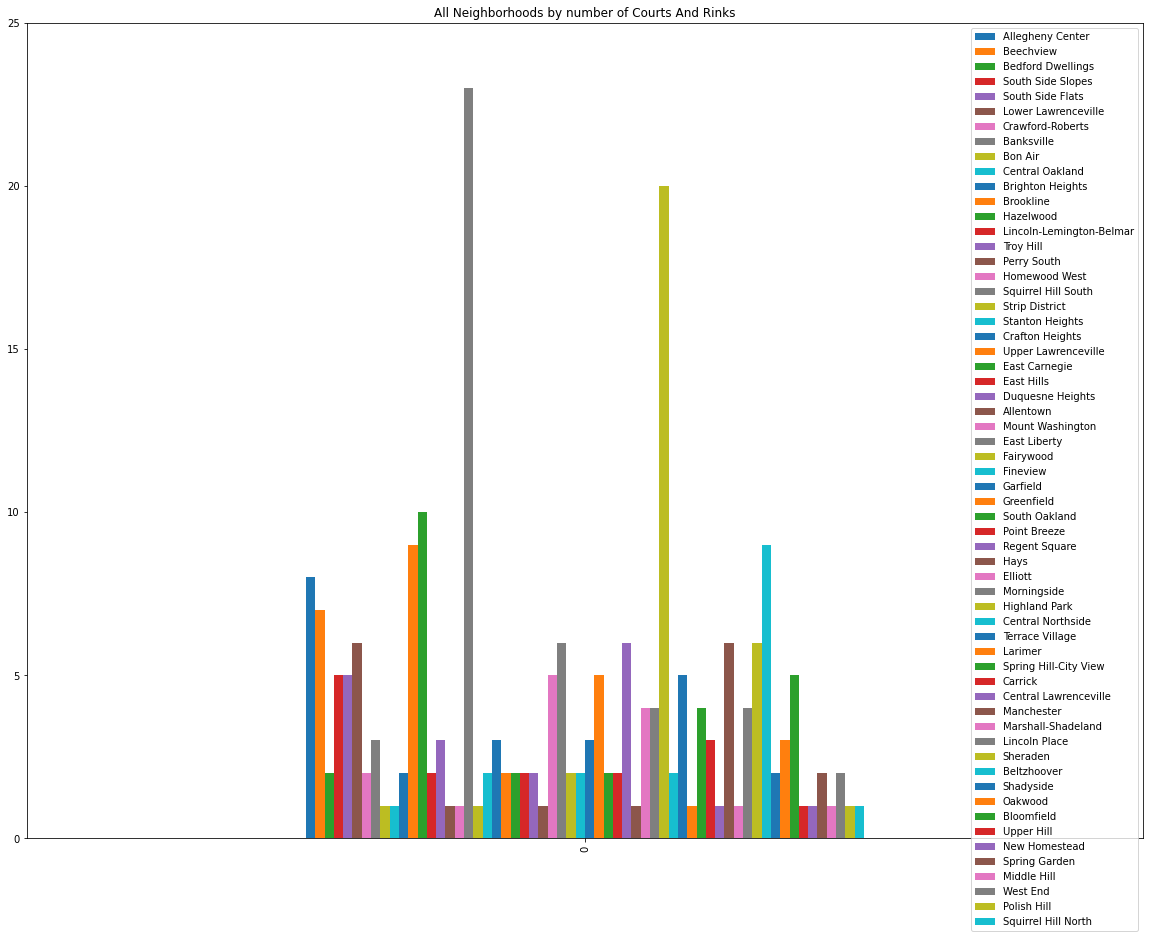

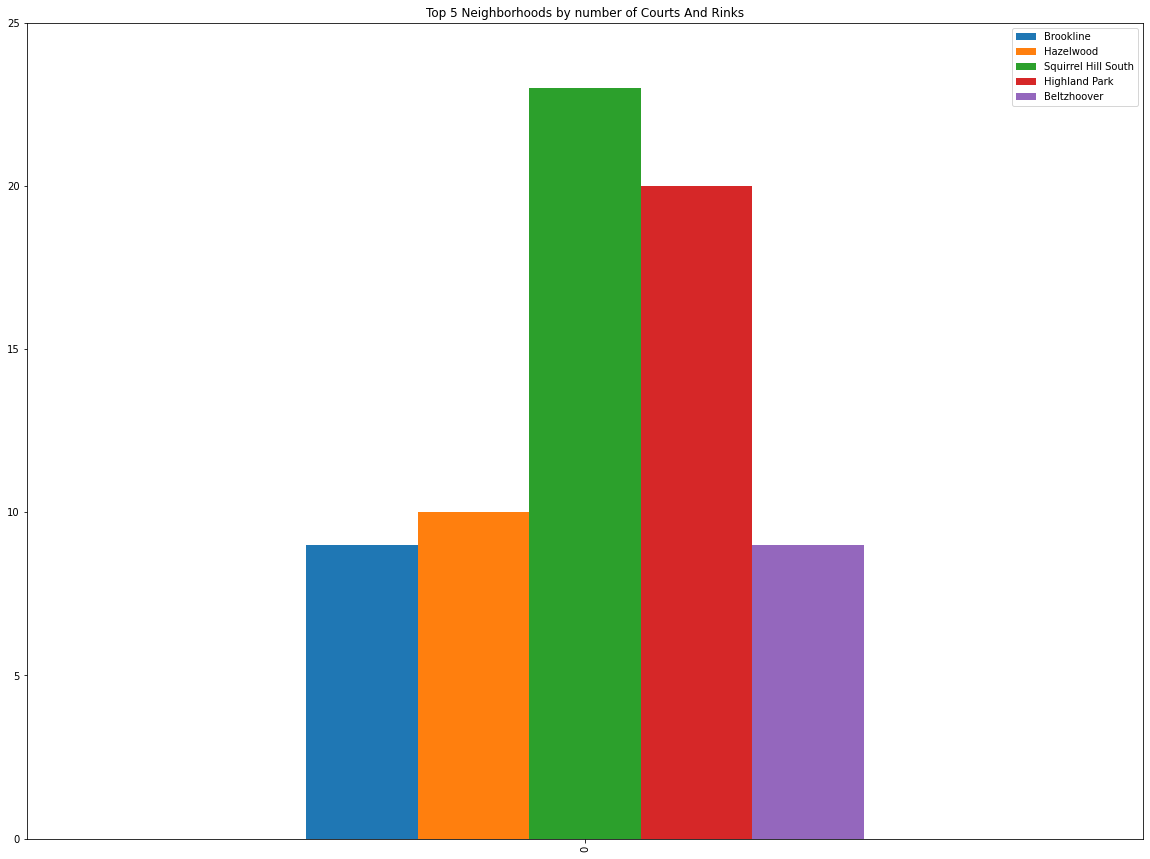

In [1]:
import pandas as pd

count = {}
top = {}
car = pd.read_csv("courtAndRink.csv", index_col = "id")

for index,row in car.iterrows():
    nh = row['neighborhood']
    if(row['inactive'] == 'f'):
        if(nh in count):
            count[nh] = count[nh] + 1
        else:
            count[nh] = 1
            
            
print("The Top 5 Neighborhoods for Courts and Rinks Are")
for nh in count:
    if(count[nh] > 8):
        print(nh, ": ", count[nh])
        top[nh] = count[nh]
        
        
print()
print("The Top 5 Neighborhoods for Courts and Rinks rated out of 100")
for nh in count:
    if(count[nh] > 8):
        print(nh, ": ", 100*count[nh]/23)
        
pd.DataFrame([count]).plot.bar(title="All Neighborhoods by number of Courts And Rinks", figsize = (20, 15) , ylim=(0,25))
pd.DataFrame([top]).plot.bar(title="Top 5 Neighborhoods by number of Courts And Rinks", figsize = (20, 15) , ylim=(0,25))

## Parks

{'Beechview': 100.0, 'South Side Slopes': 100.0, 'Hazelwood': 83.33333333333333, 'Troy Hill': 83.33333333333333, 'East Liberty': 66.66666666666667, 'Mount Washington': 83.33333333333333, 'Elliott': 66.66666666666667, 'Marshall-Shadeland': 66.66666666666667, 'Sheraden': 66.66666666666667}


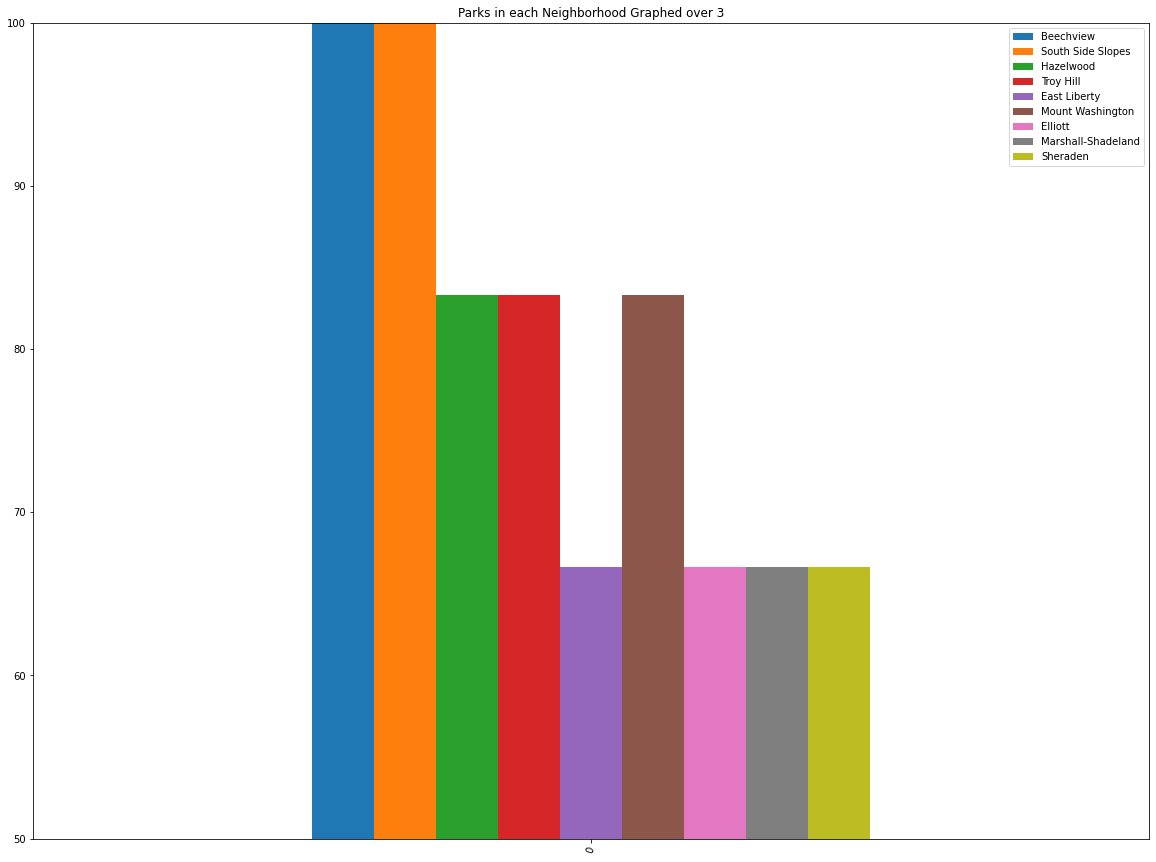

In [2]:
import pandas as pd

##Pittsburgh_City-parks.cvs is from https://data.wprdc.org/dataset/parks
##Imports Pittsburgh_City-Parks.cvs as a dataframe parks
## Only grabs the Collums Name & Neighborhood, as they are all that will be relevant to my usage
parks = pd.read_csv("Pittsburgh_City-Parks.csv", usecols = ["name","type","neighborhood"])


neighToNoOfParks = {}


for index, row in parks.iterrows():
    if row["type"] == "Park":
        key = row["neighborhood"]
        if not(key in neighToNoOfParks.keys()):
            neighToNoOfParks[key] = 100
        else:
            neighToNoOfParks[key]+=100
    
for key in neighToNoOfParks.keys():
    neighToNoOfParks[key] /= 6
            
largeNeighToNoOfParks = {}
for key in neighToNoOfParks.keys():
    if neighToNoOfParks[key] > 50:
        largeNeighToNoOfParks[key] = neighToNoOfParks[key]

pd.DataFrame([largeNeighToNoOfParks]).plot.bar(rot= 70, title="Parks in each Neighborhood Graphed over 3", figsize = (20, 15) , ylim=(50,100))

# Conclusions